In [ ]:
### pip install pystan
### conda install -c conda-forge fbprophet 
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white')
from statsmodels.tsa.stattools import adfuller
import numpy as np


In [ ]:
from fbprophet import Prophet

In [ ]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [ ]:
data = pd.read_excel("/content/DEXINUS (1).xls",skiprows=range(0,10))

In [ ]:
data.head()

,observation_date,DEXINUS
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


In [ ]:
data.dtypes

observation_date    datetime64[ns]
DEXINUS                    float64
dtype: object

In [ ]:
data['observation_date'] = pd.to_datetime(data['observation_date'])

In [ ]:
data.head()

,observation_date,DEXINUS
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12649 entries, 0 to 12648
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  12649 non-null  datetime64[ns]
 1   DEXINUS           12155 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 197.8 KB


In [ ]:
data.isnull().sum()

observation_date      0
DEXINUS             494
dtype: int64

In [ ]:
bank = data.copy(deep=True)
bank['DEXINUS'].fillna(method='ffill',inplace=True)

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12649 entries, 0 to 12648
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  12649 non-null  datetime64[ns]
 1   DEXINUS           12649 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 197.8 KB


In [ ]:
bank.shape

(12649, 2)

In [ ]:
bank.isnull().sum()

observation_date    0
DEXINUS             0
dtype: int64

In [ ]:
bank.columns

Index(['observation_date', 'DEXINUS'], dtype='object')

In [ ]:
### rename the columns
bank.columns =['ds','y']

In [ ]:
bank.head()

,ds,y
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


In [ ]:
from pandas import to_datetime

In [ ]:
bank['ds'] = pd.to_datetime(bank['ds'])

In [ ]:
bank.isnull().sum()

ds    0
y     0
dtype: int64

In [ ]:
### Initialize the model
model=Prophet()

In [ ]:
### Fit the model
model.fit(bank)


INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
model.seasonalities

OrderedDict([('yearly',
              {'condition_name': None,
               'fourier_order': 10,
               'mode': 'additive',
               'period': 365.25,
               'prior_scale': 10.0}),
             ('weekly',
              {'condition_name': None,
               'fourier_order': 3,
               'mode': 'additive',
               'period': 7,
               'prior_scale': 10.0})])

### **Creating future data for prediction**

In [ ]:
future_dates=model.make_future_dataframe(periods=30,freq='D')

In [ ]:
future_dates.head()

,ds
0,1973-01-02
1,1973-01-03
2,1973-01-04
3,1973-01-05
4,1973-01-08


In [ ]:
bank.shape

(12649, 2)

In [ ]:
future_dates.shape

(12679, 1)

In [ ]:
bank['ds'].tail()

12644   2021-06-21
12645   2021-06-22
12646   2021-06-23
12647   2021-06-24
12648   2021-06-25
Name: ds, dtype: datetime64[ns]

In [ ]:
future_dates.tail()

,ds
12674,2021-07-21
12675,2021-07-22
12676,2021-07-23
12677,2021-07-24
12678,2021-07-25


In [ ]:
###prediction on future data
prediction=model.predict(future_dates)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1973-01-02,7.533011,5.261998,9.669195,7.533011,7.533011,-0.049897,-0.049897,-0.049897,-0.087282,-0.087282,-0.087282,0.037385,0.037385,0.037385,0.0,0.0,0.0,7.483114
1,1973-01-03,7.534242,5.347238,9.738367,7.534242,7.534242,-0.059440,-0.059440,-0.059440,-0.092329,-0.092329,-0.092329,0.032889,0.032889,0.032889,0.0,0.0,0.0,7.474801
2,1973-01-04,7.535472,5.455068,9.688305,7.535472,7.535472,-0.064969,-0.064969,-0.064969,-0.093054,-0.093054,-0.093054,0.028085,0.028085,0.028085,0.0,0.0,0.0,7.470503
3,1973-01-05,7.536702,5.229682,9.739392,7.536702,7.536702,-0.081259,-0.081259,-0.081259,-0.104233,-0.104233,-0.104233,0.022974,0.022974,0.022974,0.0,0.0,0.0,7.455443
4,1973-01-08,7.540393,5.131576,9.625987,7.540393,7.540393,-0.087533,-0.087533,-0.087533,-0.093488,-0.093488,-0.093488,0.005956,0.005956,0.005956,0.0,0.0,0.0,7.452860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12674,2021-07-21,76.748365,74.339029,78.799109,76.748365,76.748365,-0.124140,-0.124140,-0.124140,-0.092329,-0.092329,-0.092329,-0.031811,-0.031811,-0.031811,0.0,0.0,0.0,76.624225
12675,2021-07-22,76.755170,74.365563,78.819989,76.755170,76.755170,-0.129411,-0.129411,-0.129411,-0.093054,-0.093054,-0.093054,-0.036357,-0.036357,-0.036357,0.0,0.0,0.0,76.625759
12676,2021-07-23,76.761974,74.405687,78.834142,76.761974,76.761974,-0.144178,-0.144178,-0.144178,-0.104233,-0.104233,-0.104233,-0.039945,-0.039945,-0.039945,0.0,0.0,0.0,76.617797
12677,2021-07-24,76.768779,74.734919,79.193145,76.768779,76.768779,0.192701,0.192701,0.192701,0.235193,0.235193,0.235193,-0.042492,-0.042492,-0.042492,0.0,0.0,0.0,76.961480


In [ ]:
prediction.isnull().sum()

ds                            0
trend                         0
yhat_lower                    0
yhat_upper                    0
trend_lower                   0
trend_upper                   0
additive_terms                0
additive_terms_lower          0
additive_terms_upper          0
weekly                        0
weekly_lower                  0
weekly_upper                  0
yearly                        0
yearly_lower                  0
yearly_upper                  0
multiplicative_terms          0
multiplicative_terms_lower    0
multiplicative_terms_upper    0
yhat                          0
dtype: int64

In [ ]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
12674,2021-07-21,76.624225,74.339029,78.799109
12675,2021-07-22,76.625759,74.365563,78.819989
12676,2021-07-23,76.617797,74.405687,78.834142
12677,2021-07-24,76.961480,74.734919,79.193145
12678,2021-07-25,76.966845,74.744440,79.218296


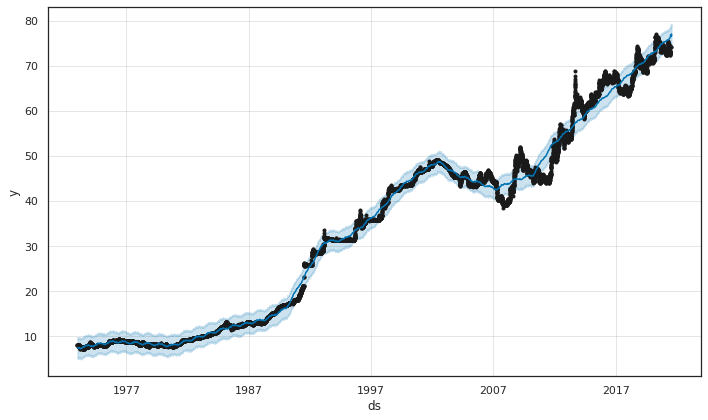

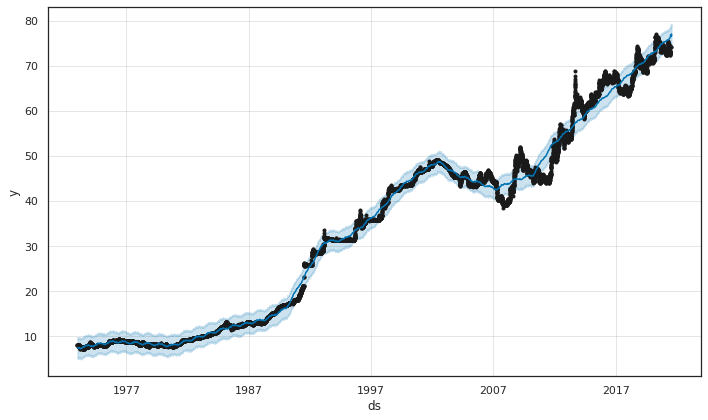

In [ ]:
model.plot(prediction) ####visualization of prediction

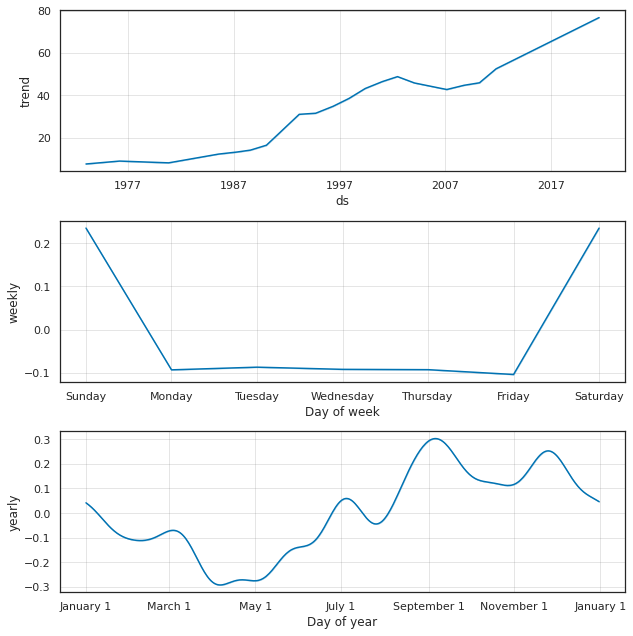

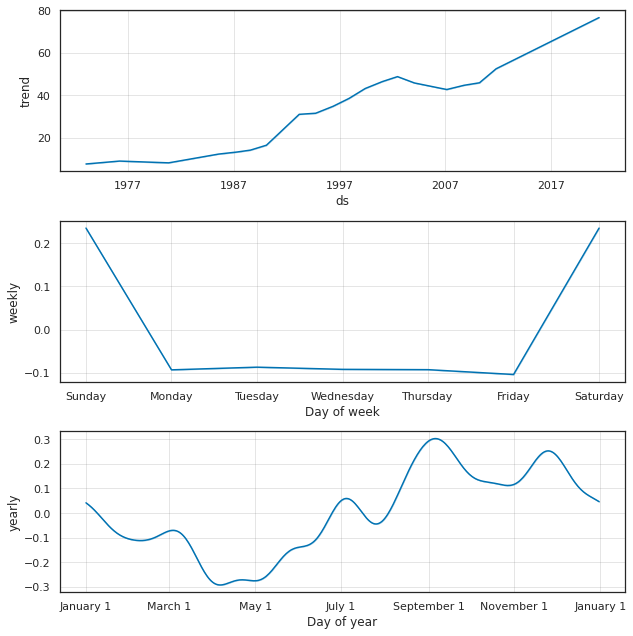

In [ ]:
model.plot_components(prediction)

In [ ]:
from fbprophet.plot import add_changepoints_to_plot

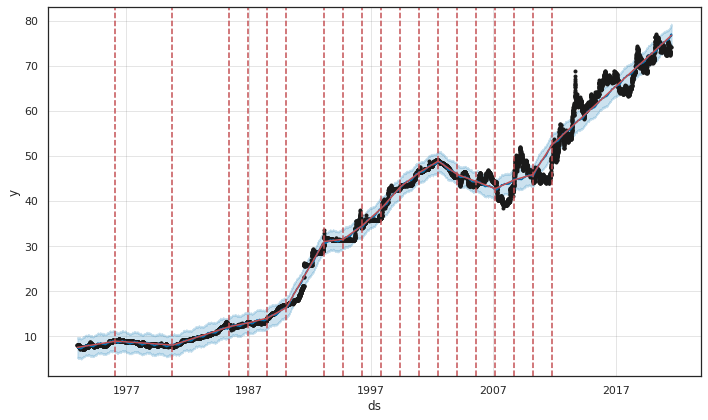

In [ ]:
figure=model.plot(prediction)
a=add_changepoints_to_plot(figure.gca(),model,prediction)

In [ ]:
from fbprophet.plot import plot_plotly,plot_components_plotly

In [ ]:
metric_data = prediction.set_index('ds')[['yhat']].join(bank.set_index('ds').y).reset_index()
metric_data.tail()

,ds,yhat,y
12674,2021-07-21,76.624225,NaN
12675,2021-07-22,76.625759,NaN
12676,2021-07-23,76.617797,NaN
12677,2021-07-24,76.961480,NaN
12678,2021-07-25,76.966845,NaN


In [ ]:
metric_data.isnull().sum()

ds       0
yhat     0
y       30
dtype: int64

In [ ]:
metric_data.dropna(inplace=True)

In [ ]:
from sklearn.metrics import  mean_squared_error,mean_absolute_error

In [ ]:
mean_squared_error(metric_data.y,metric_data.yhat)

2.946630035093659

In [ ]:
mean_absolute_error(metric_data.y,metric_data.yhat)

1.1202835245341187

In [ ]:
def mape(y_true,y_pred):
### calculate mape given y_true & y_pred
  y_true,y_pred = np.array(y_true),np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true))*100
  

In [ ]:
mape(y_true=metric_data['y'],y_pred=metric_data['yhat'])

3.2205856072356807

In [ ]:
bank.ds = pd.to_datetime(bank.ds)
bank.set_index('ds',inplace=True)

In [ ]:
split_date = '2010-06-25'
train = bank.loc[bank.index <= split_date].copy()
test = bank.loc[bank.index > split_date].copy()

In [ ]:
train.shape

(9779, 1)

In [ ]:
train.isnull().sum()

y    0
dtype: int64

In [ ]:
test.shape

(2870, 1)

In [ ]:
test.isnull().sum()

y    0
dtype: int64

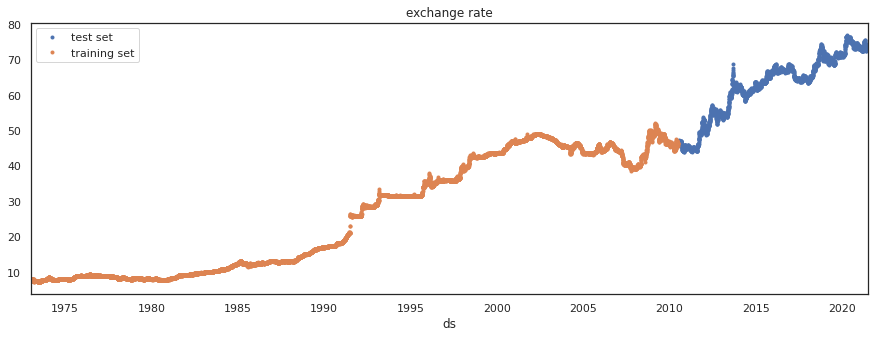

In [ ]:
### plot train and test so you can see where we have split
test \
   .rename(columns={'y': 'test set'}) \
   .join(train.rename(columns={'y':'training set'}),
         how='outer') \
   .plot(figsize=(15,5),title='exchange rate',style='.')
plt.show()

In [ ]:
train.reset_index().rename(columns={'Date':'ds','DEXINUS':'y'}).head()

,ds,y
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


In [ ]:
test_result = model.predict(bank.reset_index()\
                          .rename(columns={'Datetime':'ds'}))

In [ ]:
test_result.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
12644,2021-06-21,76.544229,74.166980,78.498740,76.544229,76.544229,-0.130761,-0.130761,-0.130761,-0.093488,-0.093488,-0.093488,-0.037272,-0.037272,-0.037272,0.0,0.0,0.0,76.413468
12645,2021-06-22,76.551034,74.168185,78.520993,76.551034,76.551034,-0.113916,-0.113916,-0.113916,-0.087282,-0.087282,-0.087282,-0.026634,-0.026634,-0.026634,0.0,0.0,0.0,76.437118
12646,2021-06-23,76.557838,74.217284,78.668278,76.557838,76.557838,-0.108346,-0.108346,-0.108346,-0.092329,-0.092329,-0.092329,-0.016017,-0.016017,-0.016017,0.0,0.0,0.0,76.449492
12647,2021-06-24,76.564643,74.307952,78.669910,76.564643,76.564643,-0.098629,-0.098629,-0.098629,-0.093054,-0.093054,-0.093054,-0.005575,-0.005575,-0.005575,0.0,0.0,0.0,76.466014
12648,2021-06-25,76.571447,74.299059,78.638772,76.571447,76.571447,-0.099696,-0.099696,-0.099696,-0.104233,-0.104233,-0.104233,0.004537,0.004537,0.004537,0.0,0.0,0.0,76.471751


In [ ]:
test.isnull().sum()

y    0
dtype: int64

In [ ]:
from fbprophet.diagnostics import  cross_validation
bank_cv = cross_validation(model, initial='730 days',period='30 days',horizon='365 days')
bank_cv.head()

INFO:fbprophet:Making 554 forecasts with cutoffs between 1975-01-23 00:00:00 and 2020-06-25 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1975-01-24,8.163681,8.071460,8.248163,8.13,1975-01-23
1,1975-01-27,8.141355,8.053748,8.224379,8.13,1975-01-23
2,1975-01-28,8.135679,8.053964,8.223576,8.13,1975-01-23
3,1975-01-29,8.125452,8.041848,8.218528,8.13,1975-01-23
4,1975-01-30,8.106738,8.024301,8.186456,8.13,1975-01-23


In [ ]:
from fbprophet.diagnostics import performance_metrics
bank_p = performance_metrics(bank_cv)
bank_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,7.097740,2.664158,1.763674,0.045551,0.033222,0.381500
1,38 days,7.123442,2.668978,1.767577,0.045696,0.033331,0.380129
2,39 days,7.143812,2.672791,1.770845,0.045829,0.033302,0.378578
3,40 days,7.161132,2.676029,1.774552,0.045984,0.033565,0.376972
4,41 days,7.179617,2.679481,1.778178,0.046126,0.033509,0.376003


In [ ]:
bank_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,7.097740,2.664158,1.763674,0.045551,0.033222,0.381500
1,38 days,7.123442,2.668978,1.767577,0.045696,0.033331,0.380129
2,39 days,7.143812,2.672791,1.770845,0.045829,0.033302,0.378578
3,40 days,7.161132,2.676029,1.774552,0.045984,0.033565,0.376972
4,41 days,7.179617,2.679481,1.778178,0.046126,0.033509,0.376003
...,...,...,...,...,...,...,...
324,361 days,15.872681,3.984053,2.908480,0.082563,0.069573,0.393533
325,362 days,15.910564,3.988805,2.913150,0.082706,0.069694,0.393311
326,363 days,15.948040,3.993500,2.917642,0.082839,0.069617,0.393139
327,364 days,15.990268,3.998783,2.922595,0.082983,0.069759,0.393486


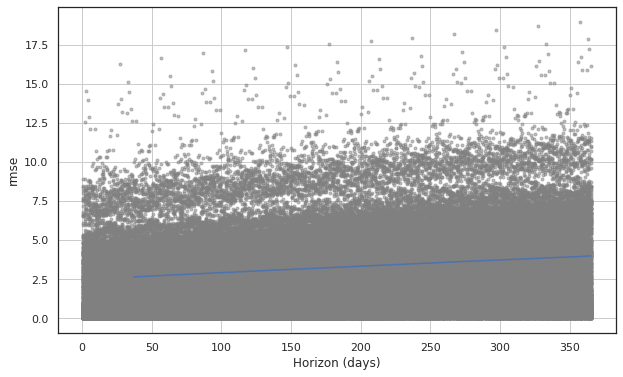

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(bank_cv, metric='rmse')